IMPORT ALL ESSENTIAL LIBRARIES

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.figure_factory as ff
import seaborn as sns 

import random

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.utils import shuffle 

#ignore warning messages
import warnings
warnings.filterwarnings('ignore') 

sns.set()

GATHER THE DATASET

In [2]:
# I have imported my own dataset that i created
music = pd.read_csv('my_music.csv')
display(music)

,Title,Time,Artist,Album,Genre,Plays
0,A-O-K,2:54,Tai Verdes,TV,Pop,NaN
1,Aa Jao Meri Tamanna,4:06,"Javed Ali, JoJo & Pritam",Ajab Prem Ki Ghazab Kahani (Original Motion Pi...,Bollywood,1.0
2,Aa To Sahi,3:41,"Meet Bros, Neha Kakkar & Roach Killa",Judwaa 2 (Original Motion Picture Soundtrack),Bollywood,20.0
3,"Aabaad Barbaad (From ""Ludo"")",5:09,Pritam & Arijit Singh,"Aabaad Barbaad (From ""Ludo"") - Single",Bollywood,3.0
4,Aaftaab,3:53,The Local Train,Aaftaab - Single,Rock,NaN
...,...,...,...,...,...,...
1427,10 Freaky Girls (feat. 21 Savage),3:28,Metro Boomin,NOT ALL HEROES WEAR CAPES (Deluxe),Hip-Hop/Rap,NaN
1428,16 Shots,3:45,Stefflon Don,Real Ting Mixtape,Hip-Hop/Rap,35.0
1429,50 Ways to Say Goodbye,4:08,Train,California 37,Pop,8.0
1430,295,4:30,Sidhu Moose Wala,Moosetape,Indian Pop,4.0


REMOVING NOISE FROM THE DATA

In [3]:
# Gather information about the dataset
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   1432 non-null   object 
 1   Time    1431 non-null   object 
 2   Artist  1430 non-null   object 
 3   Album   1427 non-null   object 
 4   Genre   1430 non-null   object 
 5   Plays   1119 non-null   float64
dtypes: float64(1), object(5)
memory usage: 67.2+ KB


In [4]:
# A lot of songs I havent played after adding to my collection
# Fill their plays = 0 and convert to integer format
music.Plays = music.Plays.fillna('0')
music.Plays = music.Plays.astype('int32')

In [5]:
# Here is what it looks like
music

,Title,Time,Artist,Album,Genre,Plays
0,A-O-K,2:54,Tai Verdes,TV,Pop,0
1,Aa Jao Meri Tamanna,4:06,"Javed Ali, JoJo & Pritam",Ajab Prem Ki Ghazab Kahani (Original Motion Pi...,Bollywood,1
2,Aa To Sahi,3:41,"Meet Bros, Neha Kakkar & Roach Killa",Judwaa 2 (Original Motion Picture Soundtrack),Bollywood,20
3,"Aabaad Barbaad (From ""Ludo"")",5:09,Pritam & Arijit Singh,"Aabaad Barbaad (From ""Ludo"") - Single",Bollywood,3
4,Aaftaab,3:53,The Local Train,Aaftaab - Single,Rock,0
...,...,...,...,...,...,...
1427,10 Freaky Girls (feat. 21 Savage),3:28,Metro Boomin,NOT ALL HEROES WEAR CAPES (Deluxe),Hip-Hop/Rap,0
1428,16 Shots,3:45,Stefflon Don,Real Ting Mixtape,Hip-Hop/Rap,35
1429,50 Ways to Say Goodbye,4:08,Train,California 37,Pop,8
1430,295,4:30,Sidhu Moose Wala,Moosetape,Indian Pop,4


In [6]:
# Check for any null values
music.isna().sum()

Title     0
Time      1
Artist    2
Album     5
Genre     2
Plays     0
dtype: int64

In [7]:
# Drop songs without Genre (these are mp3 videos downloaded from outside) 
music.drop(music[music["Genre"].isna()].index, inplace=True)
# Drop song without Time
music.drop(music[music["Time"].isna()].index, inplace=True)
# Drop song without Album 
music.drop(music[music["Album"].isna()].index, inplace=True)

In [8]:
# Confirm no null values remain
music.isna().sum()

Title     0
Time      0
Artist    0
Album     0
Genre     0
Plays     0
dtype: int64

In [9]:
# Optional: If you want to convert time into minutes and seconds: 
#music.Time = music.Time.astype('str')
#music[["Minutes", "Seconds", "Eh"]] = music["Time"].str.split(":", expand = True)
#music = music[['Title', 'Minutes', 'Seconds', 'Artist', 'Album', 'Genre', 'Plays']]
#music[["Minutes", "Seconds"]] = music[["Minutes", "Seconds"]].astype('int32') 
#music

In [10]:
# Optional: If you want to add an extra column consisting of SongID
#id = random.sample(range(1427), 1427)
#id = pd.Series(id)
#music.insert(0, 'SongID', id.values)

DATA VISUALIZATION

In [11]:
# Get all different types of Genres in my library
music.Genre.unique()

array(['Pop', 'Bollywood', 'Rock', 'Indian Pop', 'Punjabi', 'Indian',
       'Worldwide', 'Hip-Hop/Rap', 'Electronic', 'Alternative', 'Dance',
       'Singer/Songwriter', 'Punjabi Pop', 'R&B/Soul', 'House', 'Jazz',
       'Soundtrack', 'Regional Indian', 'Hard Rock', 'TV Soundtrack',
       'World', 'Indie Pop', 'K-Pop', 'Funk', 'Reggae', 'Pop in Spanish',
       'Indian Folk', 'Urbano latino', 'Indie Rock', "Children's Music",
       'Pop Latino', 'New Wave', 'Blues', 'Latin Urban', 'Latin Rap',
       'Comedy', 'Afro-Beat', 'Alternative Rap', 'Rap', 'Latin',
       'Folk-Rock', 'Afrobeats', 'Hip-Hop', 'Folk', 'Asia',
       'Alternative Folk', 'Afro-Pop', 'Unknown genre', 'Brazilian',
       'Modern Dancehall', 'Latino', 'Country', 'Pop/Rock',
       'Contemporary R&B', 'Baile Funk', 'Tamil', 'Mandopop'],
      dtype=object)

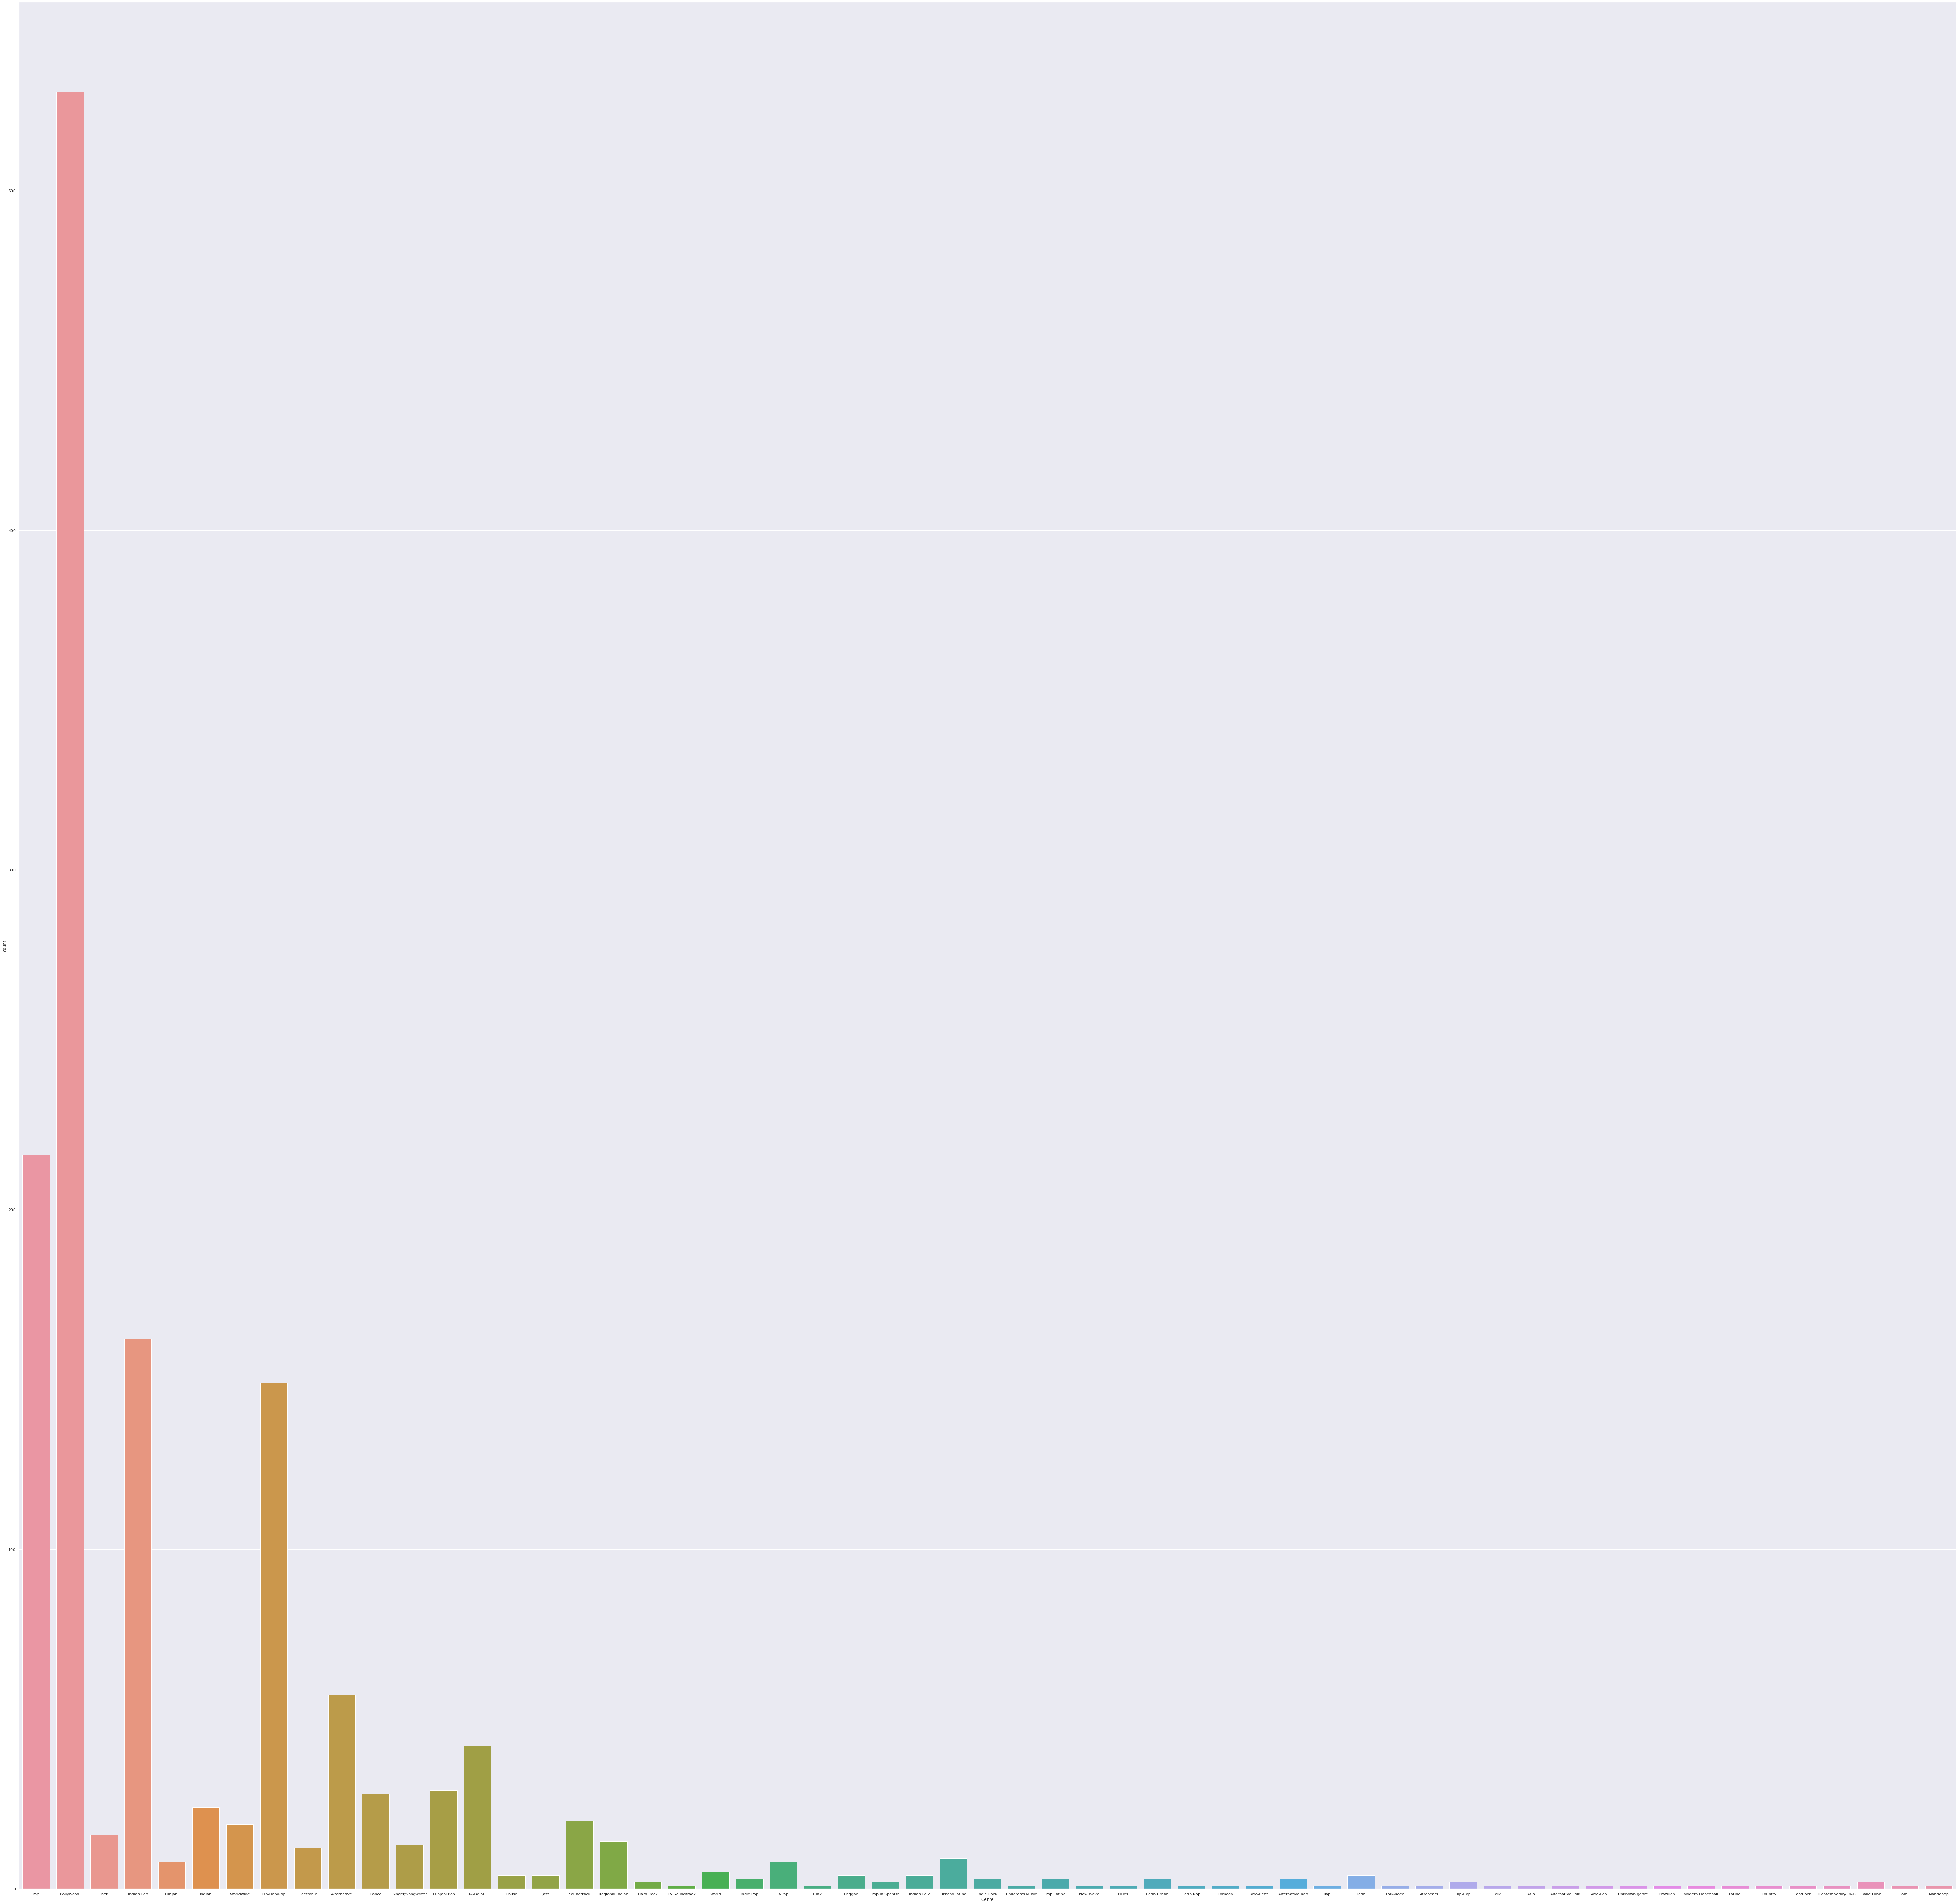

In [13]:
# Plot the number of songs from each genre
sns.countplot(data=music, x = music.Genre)
sns.set(rc = {'figure.figsize':(100,100)})

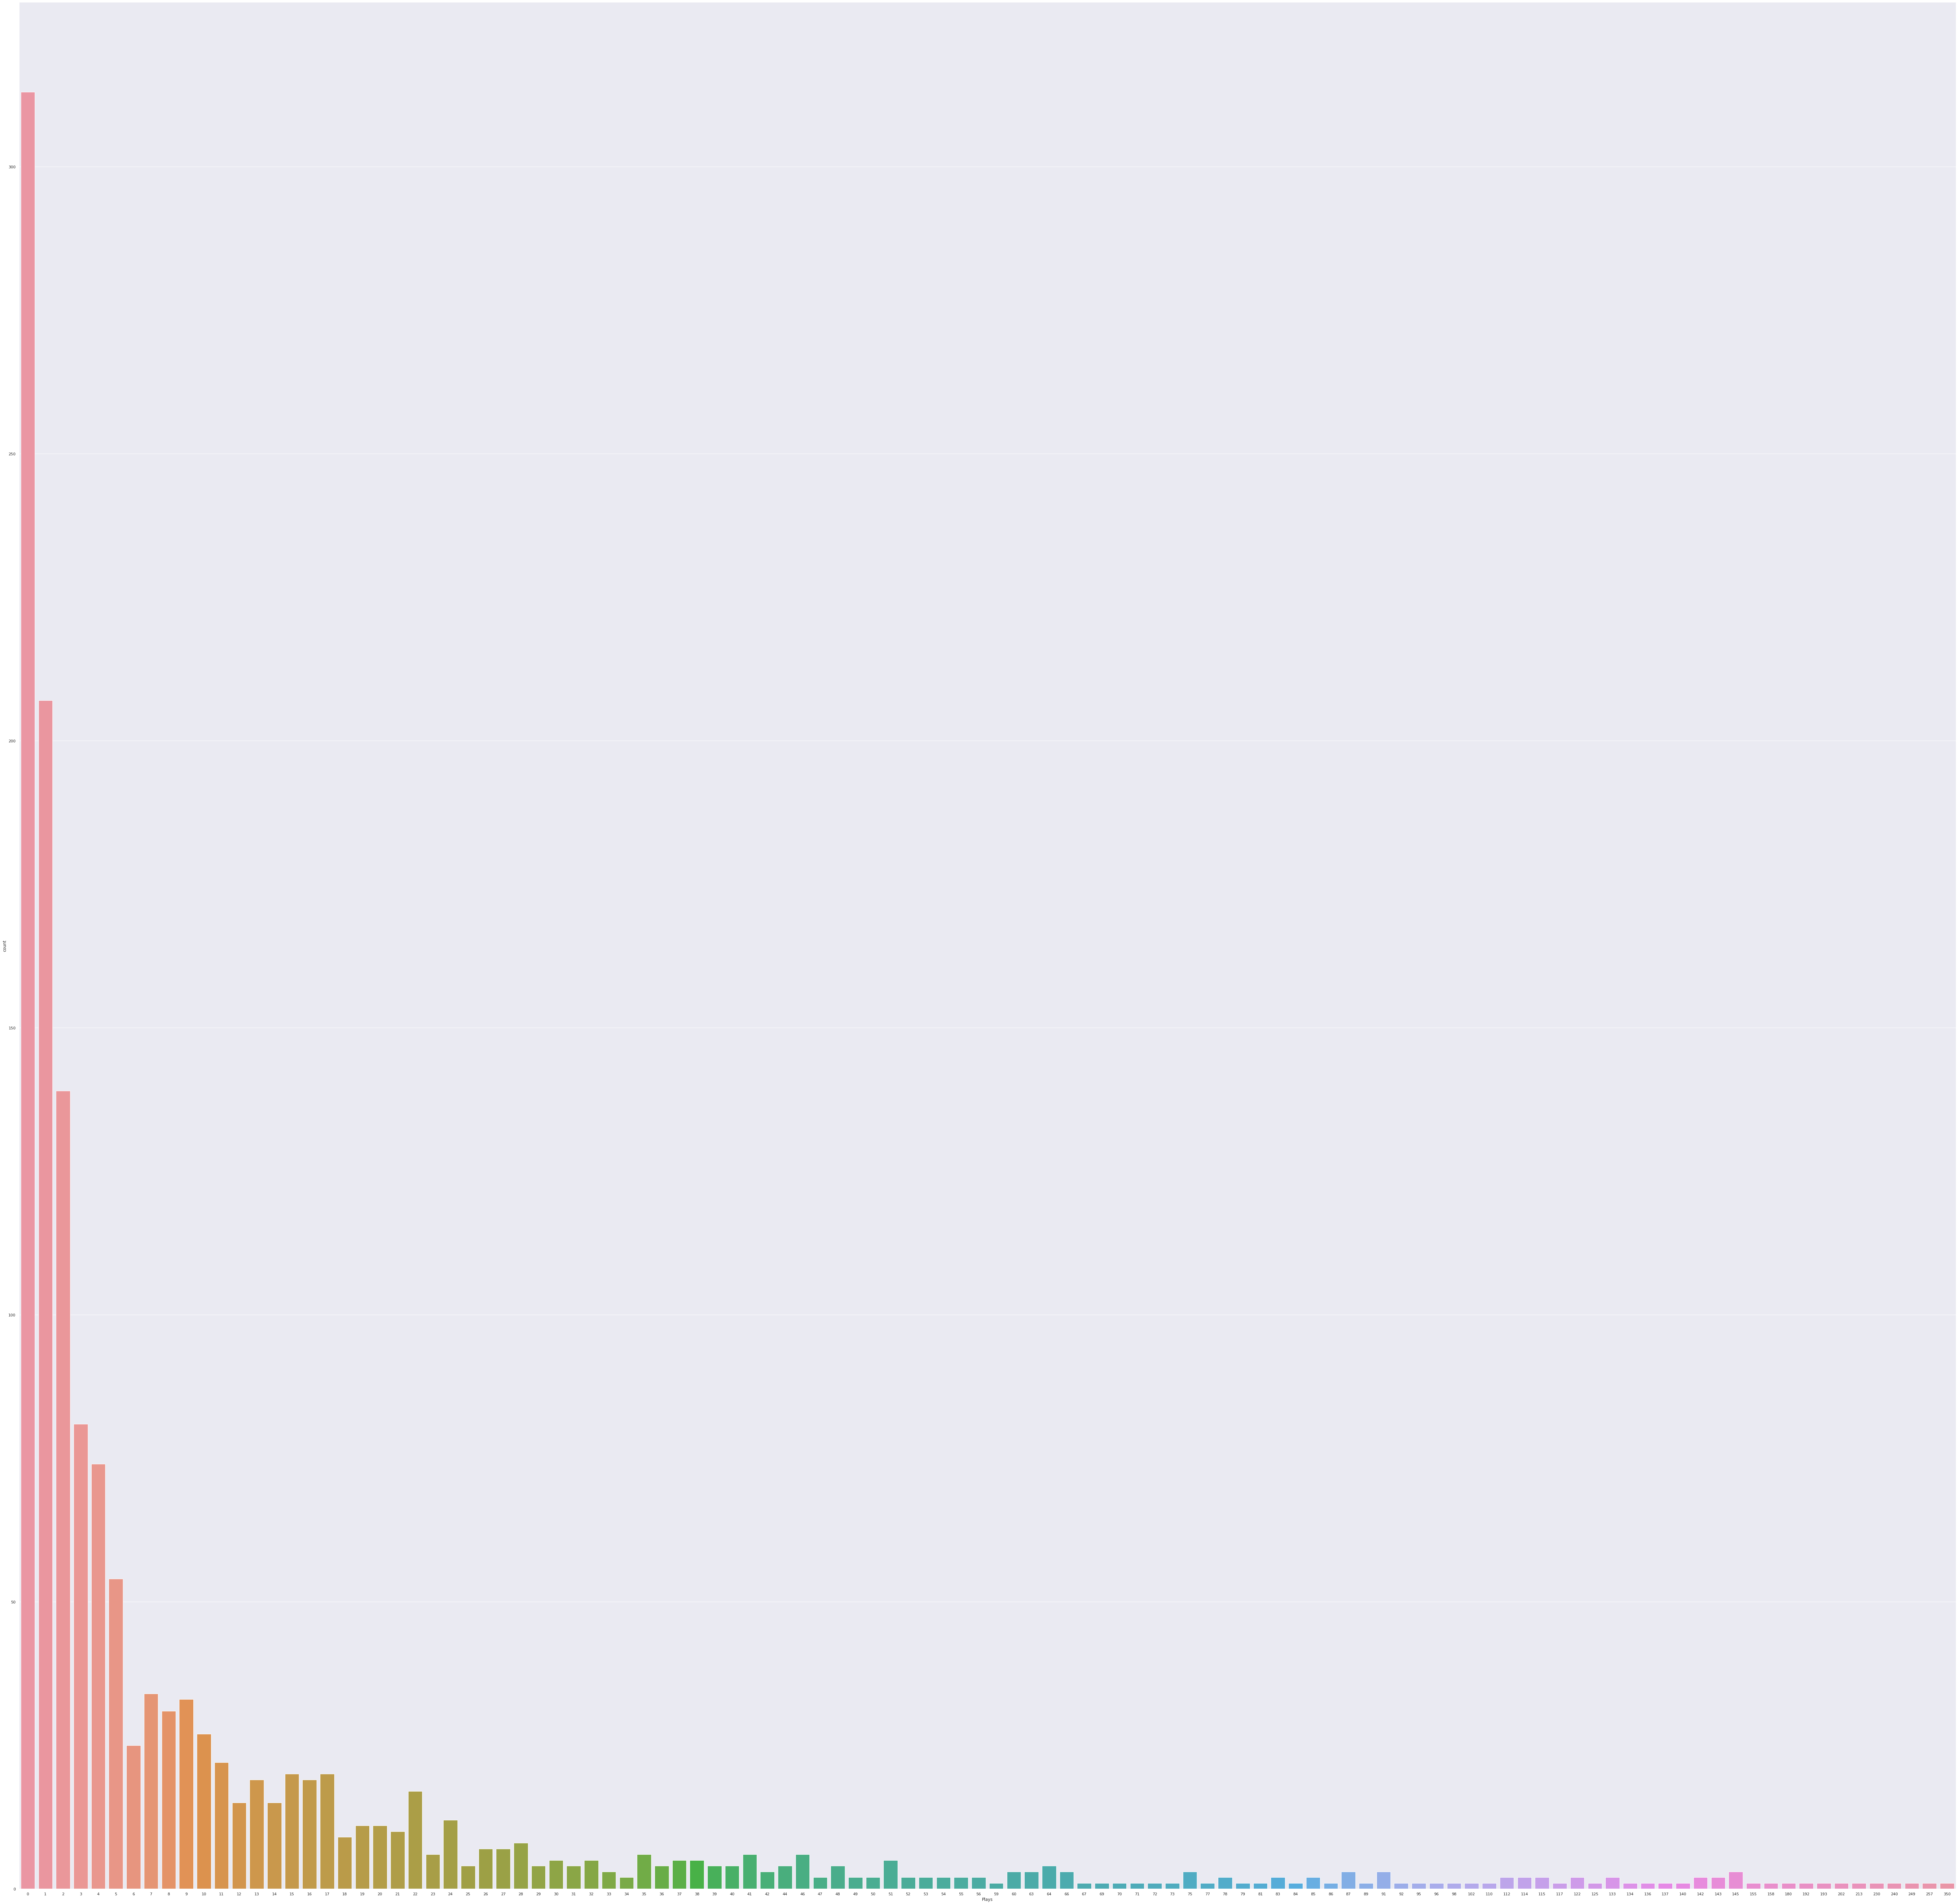

In [14]:
# Plot the number of songs played x number of times
sns.countplot(data=music, x = music.Plays)
sns.set(rc = {'figure.figsize':(100,100)})

CREATE A SOUP CONTAINING ALL THE METADATA TO FEED IN THE COUNT_VECTORIZER

In [15]:
# Create a function to create soup and gather all data
def create_soup(music):
    att = music['Title']
    for i in music[1:]:
        att = att + ' ' + str(i)
    return att
# Create a copy of the dataset and attach soup there
music_copy = music.copy()
music_copy = music_copy[['Title','Time','Artist','Album','Genre','Plays']]
music_copy['Soup'] = music_copy.apply(create_soup,axis=1)

In [16]:
# Display the Soup
music_copy.Soup

0                          A-O-K 2:54 Tai Verdes TV Pop 0
1       Aa Jao Meri Tamanna 4:06 Javed Ali, JoJo & Pri...
2       Aa To Sahi 3:41 Meet Bros, Neha Kakkar & Roach...
3       Aabaad Barbaad (From "Ludo") 5:09 Pritam & Ari...
4       Aaftaab 3:53 The Local Train Aaftaab - Single ...
                              ...                        
1427    10 Freaky Girls (feat. 21 Savage) 3:28 Metro B...
1428    16 Shots 3:45 Stefflon Don Real Ting Mixtape H...
1429    50 Ways to Say Goodbye 4:08 Train California 3...
1430     295 4:30 Sidhu Moose Wala Moosetape Indian Pop 4
1431    3005 3:54 Childish Gambino Because the Interne...
Name: Soup, Length: 1427, dtype: object

In [17]:
# Input the soup to CountVectorizer
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(music_copy['Soup'])
# Use cosine_similairty for the pairwise relation
cosine_sim2 = cosine_similarity(count_matrix)

BUILDING MUSIC RECOMMENDATION SYSTEM

In [18]:
# Create a Series of indices of all music titles
indices = pd.Series(music.index, index=music['Title'])
# Get shape of indices
indices.shape

(1427,)

In [19]:
# View indices
indices

Title
A-O-K                                   0
Aa Jao Meri Tamanna                     1
Aa To Sahi                              2
Aabaad Barbaad (From "Ludo")            3
Aaftaab                                 4
                                     ... 
10 Freaky Girls (feat. 21 Savage)    1427
16 Shots                             1428
50 Ways to Say Goodbye               1429
295                                  1430
3005                                 1431
Length: 1427, dtype: int64

DEFINING 2 FUNCTIONS - 
ONE TO OUTPUT AS IT IS AND THE OTHER FOR MORE BEAUTIFUL REPRESENTATION

In [20]:
def get_recommendations(title, similarity):
    print("        Recommendations for:",title)
    print()
    idx = indices[title]
    similarity_scores = list(enumerate(similarity[idx]))
    similarity_scores= sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores= similarity_scores[1:11]
    music_indices = [ind[0] for ind in similarity_scores]
    new_music = music["Title"].iloc[music_indices]
    return new_music

print("################ Recommendations #############")
print()
print(get_recommendations("Heather", cosine_sim2))

################ Recommendations #############

        Recommendations for: Heather

951     Nashay (feat. Rashim Anand & Toorjo Dey)
852                                        Marzi
879                          Mhmm (feat. Udbhav)
644                  Jaana (feat. Sharon Jassal)
107                       Badnam (feat. DJ Flow)
555                                  Heer Ranjha
1096                                   Ruka Hoon
12                 Aankhein (feat. Roy & Udbhav)
142                                       Bekaar
172                                       BLANKO
Name: Title, dtype: object


In [21]:
def get_recommendations_new(title, data, orig_data, similarity):
    idx = indices[title]
    # Get the pairwsie similarity scores of all music with that music
    sim_scores = list(enumerate(similarity[idx]))
    # Sort the music based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 10 most similar music
    sim_scores = sim_scores[1:11]
    # Get the music indices
    music_indices = [i[0] for i in sim_scores]
 
    # Return the top 10 most similar music sorted by Plays 
    out = orig_data[['Title', 'Time', 'Album', 'Artist', 'Genre', 'Plays']].iloc[music_indices]
    final = out.sort_values(by='Plays', ascending=False)
    colorscale = [[0, '#fad2e1'], [.5, '#fde2e4'], [1, '#fff1e6']]
    fig = ff.create_table(final, colorscale=colorscale, height_constant=70)
    fig.show()

print(get_recommendations_new("Heather", music_copy, music, cosine_sim2))

None
